In [2]:
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
from matplotlib import rc
from sympy import *

# My Solution to Exercise 1

## Part 1: Using Uniform  over $[0, \frac{\pi}{2}]$

In [83]:
# Set-up LaTeX font
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [84]:
# Define parameters
n = 250 # number of random variables
k = 100000 # number of draws from the distribution

In [85]:
# Define distribution
distribution = uniform(loc = 0, scale = 0 + np.pi/2)

In [86]:
# Set-up experiment and draw from distribution
X = distribution.rvs((k, n))
mu, s = distribution.mean(), distribution.std()

In [87]:
# Calcuate row-wise means
sample_means = np.mean(X, axis = 1)

In [88]:
# Set-up function g(x) = sin(x), g'(x) = cos(x)
x = Symbol('x')
g = sin(x)
g_l = lambdify(x, g, 'numpy')

gprime = g.diff(x)
gprime_l = lambdify(x,gprime,'numpy')

In [89]:
# Calculate converging distribution
Y = np.sqrt(n)*(g_l(sample_means) - g_l(mu))

In [90]:
# Find distribution of convergent normal obtained using the delta method
mu_n = 0
s_n = np.sqrt((gprime_l(mu)**2)*(s**2))
N = norm(loc = mu_n, scale = s_n)

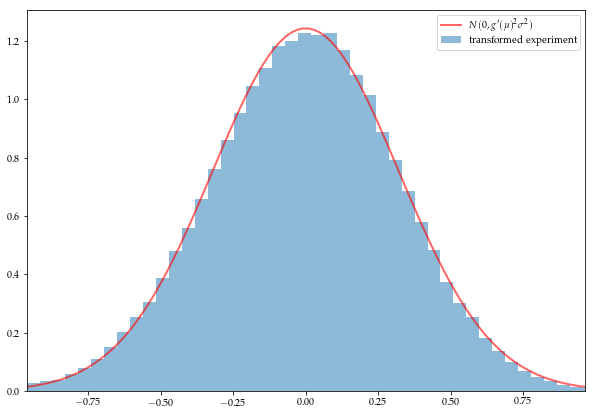

In [91]:
# Plot the resultant distributions
xmin, xmax = -3*s_n, 3*s_n
xgrid = np.linspace(xmin, xmax, 100)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(xmin,xmax)
ax.plot(xgrid, N.pdf(xgrid), 'r-', lw=2, alpha=0.6, label=r"$N(0, g'(\mu)^2  \sigma^2)$")
ax.hist(Y, bins=60, alpha=0.5, normed=True, label = 'transformed experiment')
ax.legend()
plt.show()

## Part 2: Using Uniform over $[0, \pi]$

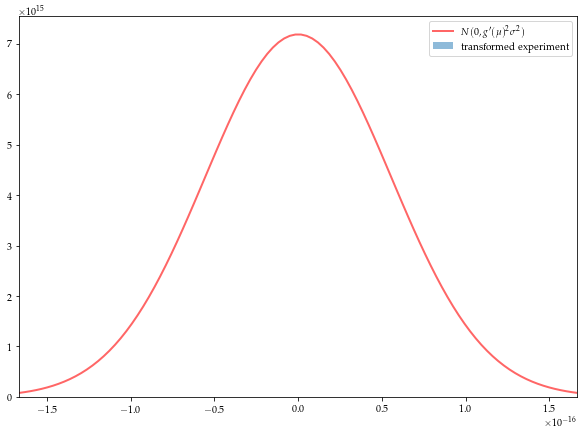

In [93]:
# Define parameters
n = 250 # number of random variables
k = 100000 # number of draws from the distribution

# Define distribution
distribution = uniform(loc = 0, scale = 0 + np.pi)

# Set-up experiment and draw from distribution
X = distribution.rvs((k, n))
mu, s = distribution.mean(), distribution.std()

# Calcuate row-wise means
sample_means = np.mean(X, axis = 1)

# Set-up function g(x) = sin(x), g'(x) = cos(x)
x = Symbol('x')
g = sin(x)
g_l = lambdify(x, g, 'numpy')

gprime = g.diff(x)
gprime_l = lambdify(x,gprime,'numpy')

# Calculate converging distribution
Y = np.sqrt(n)*(g_l(sample_means) - g_l(mu))

# Find distribution of convergent normal obtained using the delta method
mu_n = 0
s_n = np.sqrt((gprime_l(mu)**2)*(s**2))
N = norm(loc = mu_n, scale = s_n)

# Plot the resultant distributions
xmin, xmax = -3*s_n, 3*s_n
xgrid = np.linspace(xmin, xmax, 100)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(xmin,xmax)
ax.plot(xgrid, N.pdf(xgrid), 'r-', lw=2, alpha=0.6, label=r"$N(0, g'(\mu)^2  \sigma^2)$")
ax.hist(Y, bins=60, alpha=0.5, normed=True, label = 'transformed experiment')
ax.legend()
plt.show()

g'(x) = 0 so the Delta Method fails